In [42]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn import metrics
import sys
pd.set_option("display.max_columns",90) #設定pandas最多顯示出50個欄位資訊
pd.set_option('display.max_rows', None)
df = pd.read_csv("107年新竹站_20190315.csv", encoding = 'big5')
#df = pd.read_csv("大里_2020.csv", encoding = 'big5')
df =df.replace(['NR','NaN',' '],0)
df['日期'] = pd.to_datetime(df['日期'],format='%Y/%m/%d')
#df['00'] = df['00'].astype(float)
#df.dtypes
#測站: location 測項:items
df

,id,日期,測站,測項,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1,2018-10-01,新竹,AMB_TEMP,24.7,24.3,23.9,22.8,22.4,22.3,22.7,24.2,27.8,29.6,30.5,31,31.4,31.4,30.9,30.1,29,27.7,26.8,26,25.7,25.6,25.4,25
1,2,2018-10-01,新竹,CH4,1.8,1.8,1.8,1.9,1.9,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.8
2,3,2018-10-01,新竹,CO,0.26,0.16,0.14,0.13,0.14,0.15,0.18,0.3,0.3,0.2,0.21,0.21,0.25,0.24,0.29,0.3,0.34,0.41,0.48,0.46,0.38,0.36,0.3,0.24
3,4,2018-10-01,新竹,NMHC,0.05,0.05,0.05,0.05,0.05,0.06,0.06,0.09,0.1,0.08,0.07,0.08,0.09,0.09,0.1,0.11,0.14,0.16,0.16,0.15,0.1,0.09,0.05,0.04
4,5,2018-10-01,新竹,NO,0.5,0.5,0.7,0.4,0.6,0.6,0.9,2.6,2.6,1.3,1.1,1.1,1.3,0.8,0.7,0.8,2.2,4.5,0.6,0.5,-0.6*,0.6,1.1,0.4
5,6,2018-10-01,新竹,NO2,6,6.3,5.7,5.3,5.4,6.1,9,15,14,8.2,7.3,7.4,8.1,8.1,10,11,14,17,15,16,12*,9.1,7.3,6.6
6,7,2018-10-01,新竹,NOx,6.5,6.8,6.4,5.7,6,6.7,9.9,18,16,9.5,8.4,8.5,9.3,8.9,11,12,17,21,16,16,12*,9.6,8.4,6.9
7,8,2018-10-01,新竹,O3,56,53,50,48,44,42,38,34,45,59,69,75,80,82,89,87,80,77,75,76,78,79,81,78
8,9,2018-10-01,新竹,PM10,33,30,31,29,26,29,31,32,35,40,52,66,70,70,72,75,79,77,79,81,79,78,75,70
9,10,2018-10-01,新竹,PM2.5,19,17,15,17,18,13,14,19,20,19,21,22,18,19,24,31,33,34,38,42,40,38,36,29


In [43]:
df_item = pd.get_dummies(df['測項'])                                                #顯示幾種特徵
df_show = pd.merge(df,df_item ,left_index=True,right_index=True)
df_show.dtypes

id                     int64
日期            datetime64[ns]
測站                    object
測項                    object
0                     object
1                     object
2                     object
3                     object
4                     object
5                     object
6                     object
7                     object
8                     object
9                     object
10                    object
11                    object
12                    object
13                    object
14                    object
15                    object
16                    object
17                    object
18                    object
19                    object
20                    object
21                    object
22                    object
23                    object
AMB_TEMP               uint8
CH4                    uint8
CO                     uint8
NMHC                   uint8
NO                     uint8
NO2                    uint8
NOx           

In [44]:
df_show['0']=df_show['0'].str.split("x").str.get(0).str.title()
df_show['0']=df_show['0'].str.split("*").str.get(0).str.title()
df_show['0']=df_show['0'].str.split("A").str.get(0).str.title()
df_show['0']=df_show['0'].str.split("#").str.get(0).str.title()
df_show['1']=df_show['1'].str.split("x").str.get(0).str.title()
df_show['1']=df_show['1'].str.split("*").str.get(0).str.title()
df_show['1']=df_show['1'].str.split("A").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("#").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("x").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("*").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("A").str.get(0).str.title()
df_show['2']=df_show['2'].str.split("X").str.get(0).str.title()
df_show['1']=df_show['1'].str.split("#").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("x").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("*").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("A").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("X").str.get(0).str.title()
df_show['3']=df_show['3'].str.split("#").str.get(0).str.title()
df_show['0'] = df_show['0'].astype(float)
df_show['1'] = df_show['1'].astype(float)
df_show['2'] = df_show['2'].astype(float)
df_show['3'] = df_show['3'].astype(float)


In [45]:
df_show['4']=df_show['4'].str.split("#").str.get(0).str.title()
df_show['4']=df_show['4'].str.split("x").str.get(0).str.title()
df_show['4']=df_show['4'].str.split("*").str.get(0).str.title()
df_show['4']=df_show['4'].str.split("A").str.get(0).str.title()
df_show['4']=df_show['4'].str.split("X").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("#").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("x").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("*").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("A").str.get(0).str.title()
df_show['5']=df_show['5'].str.split("X").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("#").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("x").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("*").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("A").str.get(0).str.title()
df_show['6']=df_show['6'].str.split("X").str.get(0).str.title()
#print(train['00'])
df_show['4'] = df_show['4'].astype(float)
df_show['5'] = df_show['5'].astype(float)
df_show['6'] = df_show['6'].astype(float)



In [46]:
df_show = df_show.groupby("測項")
PM25 = df_show.get_group("PM2.5").reset_index(drop=True)
#PM25

In [47]:
PM25['7'] = PM25['7'].astype(float)
PM25['8'] = PM25['8'].astype(float)
PM25['9']=PM25['9'].str.split("A").str.get(0).str.title()
PM25['9'] = PM25['9'].astype(float)
PM25['10']=PM25['10'].str.split("#").str.get(0).str.title()
PM25['10'] = PM25['10'].astype(float)
PM25['11']=PM25['11'].str.split("#").str.get(0).str.title()
PM25['11']=PM25['11'].str.split("A").str.get(0).str.title()
PM25['12']=PM25['12'].str.split("#").str.get(0).str.title()
PM25['13']=PM25['13'].str.split("#").str.get(0).str.title()
PM25['14']=PM25['14'].str.split("#").str.get(0).str.title()

In [48]:
                                                                                           #PM2.5資料數值化
PM25['11'] =PM25['11'].astype(float)                                                        
PM25['12'] = PM25['12'].astype(float)
PM25['13'] = PM25['13'].astype(float)
PM25['14'] = PM25['14'].astype(float)
PM25['15'] = PM25['15'].astype(float)
PM25['16'] = PM25['16'].astype(float)
PM25['17'] = PM25['17'].astype(float)
PM25['18'] = PM25['18'].astype(float)
PM25['19'] = PM25['19'].astype(float)
PM25['20'] = PM25['20'].astype(float)
PM25['21'] = PM25['21'].astype(float)
PM25['22'] = PM25['22'].astype(float)
PM25['23'] = PM25['23'].astype(float)

In [49]:
PM25_inside = PM25[['0', '1','2', '3','4', '5','6', '7','8', '9','10', '11','12', '13'     #取出PM2.5資料 共2208筆
                    ,'14', '15','16', '17','18', '19','20', '21','22', '23']]
PM25

,id,日期,測站,測項,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,10,2018-10-01,新竹,PM2.5,19.0,17.0,15.0,17.0,18.0,13.0,14.0,19.0,20.0,19.0,21.0,22.0,18.0,19.0,24.0,31.0,33.0,34.0,38.0,42.0,40.0,38.0,36.0,29.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,28,2018-10-02,新竹,PM2.5,28.0,31.0,27.0,21.0,16.0,19.0,12.0,11.0,16.0,13.0,14.0,455.0,18.0,17.0,19.0,20.0,16.0,17.0,17.0,15.0,14.0,13.0,15.0,13.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,46,2018-10-03,新竹,PM2.5,9.0,8.0,10.0,11.0,11.0,13.0,17.0,13.0,10.0,10.0,10.0,13.0,16.0,13.0,11.0,11.0,14.0,14.0,11.0,15.0,21.0,17.0,13.0,17.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,64,2018-10-04,新竹,PM2.5,19.0,17.0,19.0,17.0,14.0,17.0,18.0,17.0,16.0,14.0,13.0,14.0,14.0,14.0,17.0,19.0,18.0,17.0,18.0,17.0,15.0,16.0,13.0,12.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,82,2018-10-05,新竹,PM2.5,13.0,15.0,16.0,17.0,19.0,19.0,19.0,19.0,21.0,22.0,23.0,23.0,21.0,24.0,24.0,22.0,19.0,21.0,24.0,23.0,28.0,31.0,27.0,27.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,100,2018-10-06,新竹,PM2.5,27.0,27.0,29.0,29.0,24.0,20.0,23.0,26.0,24.0,19.0,19.0,22.0,21.0,19.0,20.0,22.0,22.0,26.0,28.0,26.0,25.0,22.0,21.0,23.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,118,2018-10-07,新竹,PM2.5,22.0,18.0,18.0,18.0,17.0,20.0,21.0,24.0,24.0,24.0,24.0,24.0,24.0,25.0,25.0,24.0,25.0,24.0,21.0,23.0,24.0,22.0,17.0,16.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,136,2018-10-08,新竹,PM2.5,16.0,18.0,19.0,18.0,17.0,17.0,21.0,19.0,15.0,14.0,14.0,16.0,20.0,24.0,25.0,26.0,21.0,22.0,23.0,21.0,20.0,20.0,22.0,21.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,154,2018-10-09,新竹,PM2.5,21.0,19.0,18.0,16.0,16.0,20.0,22.0,24.0,24.0,24.0,25.0,24.0,23.0,20.0,20.0,19.0,18.0,22.0,23.0,23.0,23.0,22.0,22.0,20.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,172,2018-10-10,新竹,PM2.5,20.0,21.0,21.0,17.0,14.0,10.0,10.0,14.0,18.0,20.0,16.0,20.0,25.0,24.0,23.0,24.0,28.0,32.0,32.0,30.0,35.0,37.0,33.0,35.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [198]:
Initial=[]      
ds=[]
#PM2.5設為矩正
PM25_inside
Initial=PM25_inside.values
Initial

array([[19., 17., 15., ..., 38., 36., 29.],
       [28., 31., 27., ..., 13., 15., 13.],
       [ 9.,  8., 10., ..., 17., 13., 17.],
       ...,
       [20., 16., 13., ...,  6.,  9.,  8.],
       [ 4.,  4.,  5., ..., 10., 13., 11.],
       [ 9., 11.,  9., ...,  9.,  5.,  7.]])

In [199]:
Train = Initial[:65,:]
Train.shape[0]

#Train[64,:]
print(Initial[64,:])
Train.shape

[30. 24. 19. 15. 13. 11. 13. 16. 18. 18. 17. 12. 12. 13. 12. 10. 11. 17.
 24. 28. 41. 47. 44. 41.]


(65, 24)

In [210]:
dx=[]                                                   #整理預測6點到23點的訓練資料
dy=[]

for j in range(0,18):                             
    for i in range(0,65):
        dx.append(Train[i,j:j+6])                 #當J固定之後，i就每列呈現
        dy.append(Train[i,j+6])      
        

six_end_TrainX = pd.DataFrame(dx)
six_end_TrainY = pd.DataFrame(dy)
#six_end_Y
#six_end_X
six_end_TrainX
#six_end_TrainY 

,0,1,2,3,4,5
0,19.0,17.0,15.0,17.0,18.0,13.0
1,28.0,31.0,27.0,21.0,16.0,19.0
2,9.0,8.0,10.0,11.0,11.0,13.0
3,19.0,17.0,19.0,17.0,14.0,17.0
4,13.0,15.0,16.0,17.0,19.0,19.0
5,27.0,27.0,29.0,29.0,24.0,20.0
6,22.0,18.0,18.0,18.0,17.0,20.0
7,16.0,18.0,19.0,18.0,17.0,17.0
8,21.0,19.0,18.0,16.0,16.0,20.0
9,20.0,21.0,21.0,17.0,14.0,10.0


In [201]:
D=[]                                                                                  #合併預測0點到5點的資料
Initial[0:92,18:24]   
print(Initial[0:92,18:24].shape) #尾端

Initial[1:92,0:6]     
print(Initial[1:92,0:6].shape)   #前端

D = np.hstack((Initial[0:91,18:24],Initial[1:92,0:6]))

zero_five = pd.DataFrame(D)
zero_five.columns = ['18','19','20','21','22','23','0','1','2','3','4','5']
zero_five

(92, 6)
(91, 6)


,18,19,20,21,22,23,0,1,2,3,4,5
0,38.0,42.0,40.0,38.0,36.0,29.0,28.0,31.0,27.0,21.0,16.0,19.0
1,17.0,15.0,14.0,13.0,15.0,13.0,9.0,8.0,10.0,11.0,11.0,13.0
2,11.0,15.0,21.0,17.0,13.0,17.0,19.0,17.0,19.0,17.0,14.0,17.0
3,18.0,17.0,15.0,16.0,13.0,12.0,13.0,15.0,16.0,17.0,19.0,19.0
4,24.0,23.0,28.0,31.0,27.0,27.0,27.0,27.0,29.0,29.0,24.0,20.0
5,28.0,26.0,25.0,22.0,21.0,23.0,22.0,18.0,18.0,18.0,17.0,20.0
6,21.0,23.0,24.0,22.0,17.0,16.0,16.0,18.0,19.0,18.0,17.0,17.0
7,23.0,21.0,20.0,20.0,22.0,21.0,21.0,19.0,18.0,16.0,16.0,20.0
8,23.0,23.0,23.0,22.0,22.0,20.0,20.0,21.0,21.0,17.0,14.0,10.0
9,32.0,30.0,35.0,37.0,33.0,35.0,33.0,28.0,23.0,17.0,15.0,11.0


In [202]:
Train2=D[:64,:]
print(Train2[63,:])
Train2.shape

[49. 60. 57. 44. 37. 37. 30. 24. 19. 15. 13. 11.]


(64, 12)

In [203]:
dm= []
dn=[]
                                                                #整理預測0點到5點的訓練資料
for j in range(0,6):                             
    for i in range(0,64):
            dm.append(Train2[i,j:j+6])                   #當J固定之後，i就每列呈現
            dn.append(Train2[i,j+6])      
 


In [209]:
zero_five_TrainX= pd.DataFrame(dm)

zero_five_TrainY= pd.DataFrame(dn)
zero_five_TrainX
#zero_five_TrainY

,0,1,2,3,4,5
0,38.0,42.0,40.0,38.0,36.0,29.0
1,17.0,15.0,14.0,13.0,15.0,13.0
2,11.0,15.0,21.0,17.0,13.0,17.0
3,18.0,17.0,15.0,16.0,13.0,12.0
4,24.0,23.0,28.0,31.0,27.0,27.0
5,28.0,26.0,25.0,22.0,21.0,23.0
6,21.0,23.0,24.0,22.0,17.0,16.0
7,23.0,21.0,20.0,20.0,22.0,21.0
8,23.0,23.0,23.0,22.0,22.0,20.0
9,32.0,30.0,35.0,37.0,33.0,35.0


In [218]:
#訓練集垂直合併
#six_end_TrainX.append(zero_five_TrainX)
X_train = pd.concat([six_end_TrainX,zero_five_TrainX], ignore_index=True) # ignore index
y_train = pd.concat([six_end_TrainY,zero_five_TrainY], ignore_index=True) # ignore index
X_train 
y_train 
X_train = X_train.fillna(0)
y_train  = y_train.fillna(0)

In [219]:
from sklearn.preprocessing import StandardScaler                                                          #標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)

In [221]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_std, y_train)
#print("MSE: %.2f" % np.mean((regr.predict(X_test_std) - y_test) ** 2))
#print("Test R Square_test:",regr.score(X_test_std, y_test))
print("Train R Square_train:",regr.score(X_train_std, y_train))

Train R Square_train: 0.04450161731338287


In [226]:
X_rnn = np.array(X_train).reshape(len(X_train), 6,1)                              #使用簡單RNN
y_rnn = np.array(y_train).reshape(len(y_train),1)
print(X_rnn.shape)
print(y_rnn.shape)


(1554, 6, 1)
(1554, 1)


In [227]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN

In [228]:
model = Sequential()
model.add(SimpleRNN(units=16, input_shape=(6,1)))
model.add(Dense(256))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 16)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               4352      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [229]:
model.fit(X_rnn, y_rnn, epochs=1000, batch_size=5, verbose=2)

Epoch 1/1000
311/311 - 1s - loss: 1575.4834
Epoch 2/1000
311/311 - 0s - loss: 1490.9108
Epoch 3/1000
311/311 - 0s - loss: 1471.0161
Epoch 4/1000
311/311 - 0s - loss: 1467.2312
Epoch 5/1000
311/311 - 0s - loss: 1468.2605
Epoch 6/1000
311/311 - 0s - loss: 1457.7931
Epoch 7/1000
311/311 - 0s - loss: 1458.1332
Epoch 8/1000
311/311 - 0s - loss: 1459.6508
Epoch 9/1000
311/311 - 0s - loss: 1460.4368
Epoch 10/1000
311/311 - 0s - loss: 1447.1437
Epoch 11/1000
311/311 - 0s - loss: 1446.8992
Epoch 12/1000
311/311 - 0s - loss: 1449.5914
Epoch 13/1000
311/311 - 0s - loss: 1448.0282
Epoch 14/1000
311/311 - 0s - loss: 1448.2045
Epoch 15/1000
311/311 - 0s - loss: 1443.6613
Epoch 16/1000
311/311 - 0s - loss: 1446.5011
Epoch 17/1000
311/311 - 0s - loss: 1454.2419
Epoch 18/1000
311/311 - 0s - loss: 1439.1813
Epoch 19/1000
311/311 - 0s - loss: 1442.2313
Epoch 20/1000
311/311 - 0s - loss: 1442.3055
Epoch 21/1000
311/311 - 0s - loss: 1444.6246
Epoch 22/1000
311/311 - 0s - loss: 1439.5365
Epoch 23/1000
311/3

Epoch 182/1000
311/311 - 0s - loss: 1354.4186
Epoch 183/1000
311/311 - 0s - loss: 1320.8302
Epoch 184/1000
311/311 - 0s - loss: 1287.1322
Epoch 185/1000
311/311 - 0s - loss: 1273.2020
Epoch 186/1000
311/311 - 0s - loss: 1284.1763
Epoch 187/1000
311/311 - 0s - loss: 1296.8429
Epoch 188/1000
311/311 - 0s - loss: 1268.4253
Epoch 189/1000
311/311 - 0s - loss: 1271.2064
Epoch 190/1000
311/311 - 0s - loss: 1279.3987
Epoch 191/1000
311/311 - 0s - loss: 1270.3605
Epoch 192/1000
311/311 - 0s - loss: 1297.5173
Epoch 193/1000
311/311 - 0s - loss: 1277.3196
Epoch 194/1000
311/311 - 0s - loss: 1289.3022
Epoch 195/1000
311/311 - 0s - loss: 1239.8799
Epoch 196/1000
311/311 - 0s - loss: 1272.1268
Epoch 197/1000
311/311 - 0s - loss: 1302.1005
Epoch 198/1000
311/311 - 0s - loss: 1335.9984
Epoch 199/1000
311/311 - 0s - loss: 1267.0735
Epoch 200/1000
311/311 - 0s - loss: 1249.8794
Epoch 201/1000
311/311 - 0s - loss: 1250.4973
Epoch 202/1000
311/311 - 0s - loss: 1259.2114
Epoch 203/1000
311/311 - 0s - loss

311/311 - 0s - loss: 1136.1543
Epoch 361/1000
311/311 - 0s - loss: 1127.4198
Epoch 362/1000
311/311 - 0s - loss: 1133.2341
Epoch 363/1000
311/311 - 0s - loss: 1159.7557
Epoch 364/1000
311/311 - 0s - loss: 1147.5404
Epoch 365/1000
311/311 - 0s - loss: 1157.2119
Epoch 366/1000
311/311 - 0s - loss: 1258.8329
Epoch 367/1000
311/311 - 0s - loss: 1161.2462
Epoch 368/1000
311/311 - 0s - loss: 1145.1112
Epoch 369/1000
311/311 - 0s - loss: 1238.5026
Epoch 370/1000
311/311 - 0s - loss: 1224.7310
Epoch 371/1000
311/311 - 0s - loss: 1230.0073
Epoch 372/1000
311/311 - 0s - loss: 1209.0563
Epoch 373/1000
311/311 - 0s - loss: 1262.5179
Epoch 374/1000
311/311 - 0s - loss: 1205.4692
Epoch 375/1000
311/311 - 0s - loss: 1147.1361
Epoch 376/1000
311/311 - 0s - loss: 1130.9730
Epoch 377/1000
311/311 - 0s - loss: 1212.8057
Epoch 378/1000
311/311 - 0s - loss: 1246.2478
Epoch 379/1000
311/311 - 0s - loss: 1330.6716
Epoch 380/1000
311/311 - 0s - loss: 1207.3820
Epoch 381/1000
311/311 - 0s - loss: 1147.7631
Epo

Epoch 539/1000
311/311 - 0s - loss: 1238.2195
Epoch 540/1000
311/311 - 0s - loss: 1228.3657
Epoch 541/1000
311/311 - 0s - loss: 1294.6117
Epoch 542/1000
311/311 - 0s - loss: 1202.8882
Epoch 543/1000
311/311 - 0s - loss: 1272.1252
Epoch 544/1000
311/311 - 0s - loss: 1206.3907
Epoch 545/1000
311/311 - 0s - loss: 1127.5638
Epoch 546/1000
311/311 - 0s - loss: 1109.3890
Epoch 547/1000
311/311 - 0s - loss: 1097.3807
Epoch 548/1000
311/311 - 0s - loss: 1097.3076
Epoch 549/1000
311/311 - 0s - loss: 1128.6206
Epoch 550/1000
311/311 - 0s - loss: 1109.1285
Epoch 551/1000
311/311 - 0s - loss: 1151.6315
Epoch 552/1000
311/311 - 0s - loss: 1260.2891
Epoch 553/1000
311/311 - 0s - loss: 1140.4288
Epoch 554/1000
311/311 - 0s - loss: 1122.6815
Epoch 555/1000
311/311 - 0s - loss: 1103.1490
Epoch 556/1000
311/311 - 0s - loss: 1094.4255
Epoch 557/1000
311/311 - 0s - loss: 1092.8020
Epoch 558/1000
311/311 - 0s - loss: 1101.1294
Epoch 559/1000
311/311 - 0s - loss: 1094.9429
Epoch 560/1000
311/311 - 1s - loss

311/311 - 0s - loss: 1072.5452
Epoch 718/1000
311/311 - 0s - loss: 1192.7124
Epoch 719/1000
311/311 - 0s - loss: 1179.1636
Epoch 720/1000
311/311 - 0s - loss: 1091.3751
Epoch 721/1000
311/311 - 0s - loss: 1078.0388
Epoch 722/1000
311/311 - 0s - loss: 1067.3807
Epoch 723/1000
311/311 - 0s - loss: 1059.5781
Epoch 724/1000
311/311 - 0s - loss: 1066.6605
Epoch 725/1000
311/311 - 0s - loss: 1111.0959
Epoch 726/1000
311/311 - 0s - loss: 1087.8248
Epoch 727/1000
311/311 - 0s - loss: 1092.0234
Epoch 728/1000
311/311 - 0s - loss: 1118.8496
Epoch 729/1000
311/311 - 0s - loss: 1372.1266
Epoch 730/1000
311/311 - 0s - loss: 1408.3203
Epoch 731/1000
311/311 - 0s - loss: 1122.7346
Epoch 732/1000
311/311 - 0s - loss: 1094.5280
Epoch 733/1000
311/311 - 0s - loss: 1079.8431
Epoch 734/1000
311/311 - 0s - loss: 1066.4501
Epoch 735/1000
311/311 - 0s - loss: 1064.1621
Epoch 736/1000
311/311 - 0s - loss: 1067.7228
Epoch 737/1000
311/311 - 0s - loss: 1072.4963
Epoch 738/1000
311/311 - 0s - loss: 1294.5923
Epo

Epoch 896/1000
311/311 - 0s - loss: 1035.1766
Epoch 897/1000
311/311 - 0s - loss: 1033.2690
Epoch 898/1000
311/311 - 1s - loss: 1043.0687
Epoch 899/1000
311/311 - 1s - loss: 1031.8419
Epoch 900/1000
311/311 - 1s - loss: 1028.9399
Epoch 901/1000
311/311 - 0s - loss: 1023.7136
Epoch 902/1000
311/311 - 0s - loss: 1080.6101
Epoch 903/1000
311/311 - 0s - loss: 1404.1661
Epoch 904/1000
311/311 - 0s - loss: 1147.9227
Epoch 905/1000
311/311 - 0s - loss: 1133.7936
Epoch 906/1000
311/311 - 0s - loss: 1258.9598
Epoch 907/1000
311/311 - 0s - loss: 1019.9711
Epoch 908/1000
311/311 - 0s - loss: 1005.6512
Epoch 909/1000
311/311 - 0s - loss: 994.8305
Epoch 910/1000
311/311 - 0s - loss: 994.4648
Epoch 911/1000
311/311 - 0s - loss: 1028.2213
Epoch 912/1000
311/311 - 0s - loss: 1094.1433
Epoch 913/1000
311/311 - 0s - loss: 1048.7469
Epoch 914/1000
311/311 - 0s - loss: 1297.3271
Epoch 915/1000
311/311 - 0s - loss: 1241.3162
Epoch 916/1000
311/311 - 0s - loss: 1164.6528
Epoch 917/1000
311/311 - 0s - loss: 

In [230]:
y_pred_rnn = model.predict(X_rnn).reshape(-1)
y_pred_rnn.shape

(1554,)

<AxesSubplot:title={'center':'折線圖'}>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25240 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22294 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25240 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22294 missing from curre

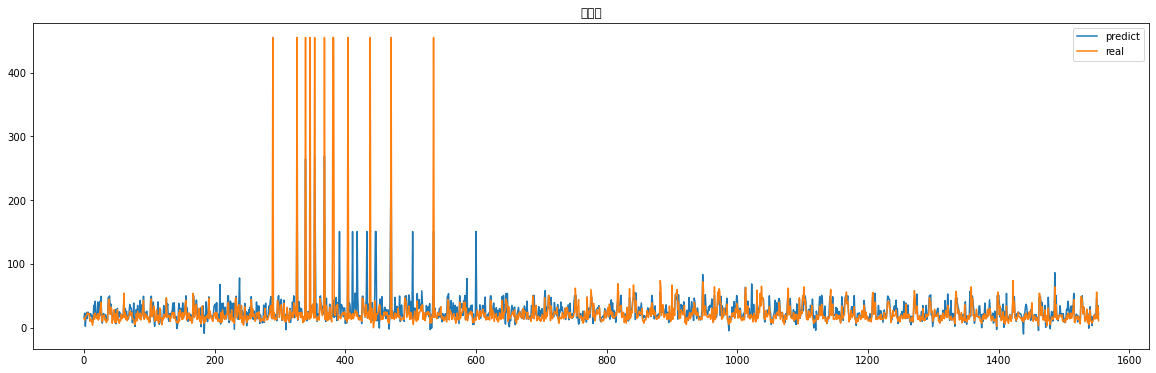

In [236]:
predict = pd.DataFrame(y_pred_rnn)
predict.columns = ['predict']
train_values = pd.DataFrame(y_train.values)
train_values.columns = ['real']
df1 = pd.concat( [predict, train_values], axis=1 )
df1.plot(kind='line',title='折線圖',figsize=(20,6))